In [19]:
import numpy as np 
import pandas as pd

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [2]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [3]:
prior = pd.read_csv('order_products__prior.csv')
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [5]:
train = pd.read_csv('order_products__train.csv')
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
prior = prior[0:20000000]

In [7]:
order_prior = pd.merge(prior,orders,on=['order_id','order_id'])
order_prior = order_prior.sort_values(by=['user_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
4089398,431534,196,1,1,1,prior,5,4,15,28.0
4089399,431534,12427,2,1,1,prior,5,4,15,28.0
4089400,431534,10258,3,1,1,prior,5,4,15,28.0
4089401,431534,25133,4,1,1,prior,5,4,15,28.0
4089402,431534,10326,5,0,1,prior,5,4,15,28.0


In [8]:
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
aisles = pd.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
print(aisles.shape)

(134, 2)


In [11]:
_mt = pd.merge(prior,products, on = ['product_id','product_id'])
_mt = pd.merge(_mt,orders,on=['order_id','order_id'])
mt = pd.merge(_mt,aisles,on=['aisle_id','aisle_id'])
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


In [12]:
mt['product_name'].value_counts()[0:10]

product_name
Banana                    292093
Bag of Organic Bananas    233740
Organic Strawberries      163271
Organic Baby Spinach      148875
Organic Hass Avocado      131512
Organic Avocado           108842
Large Lemon                93992
Strawberries               87888
Limes                      86660
Organic Whole Milk         85304
Name: count, dtype: int64

In [13]:
len(mt['product_name'].unique())

49518

## Clustering

In [15]:
len(mt['aisle'].unique())

134

In [16]:
mt['aisle'].value_counts()[0:10]

aisle
fresh fruits                     2246484
fresh vegetables                 2105804
packaged vegetables fruits       1087997
yogurt                            895531
packaged cheese                   604011
milk                              549891
water seltzer sparkling water     519296
chips pretzels                    445880
soy lactosefree                   393631
bread                             361134
Name: count, dtype: int64

In [17]:
cust_prod = pd.crosstab(mt['user_id'], mt['aisle'])
cust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,33
3,0,0,0,0,0,0,0,0,0,0,...,3,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,14


In [18]:
cust_prod.shape

(204207, 134)

In [20]:
pca = PCA(n_components=6)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)

C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` 

In [21]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5
0,-15.367386,0.588745,-2.843485,1.791550,-0.052651,0.109393
1,6.938257,27.627858,9.586356,11.405871,-4.670553,-0.981994
2,-4.411814,2.225211,-7.570784,0.233757,-0.742608,-0.842840
3,-17.100659,-0.443287,-1.725908,1.985198,-0.131453,0.451595
4,-13.311972,-1.135273,0.504240,2.255518,0.469935,-1.053350


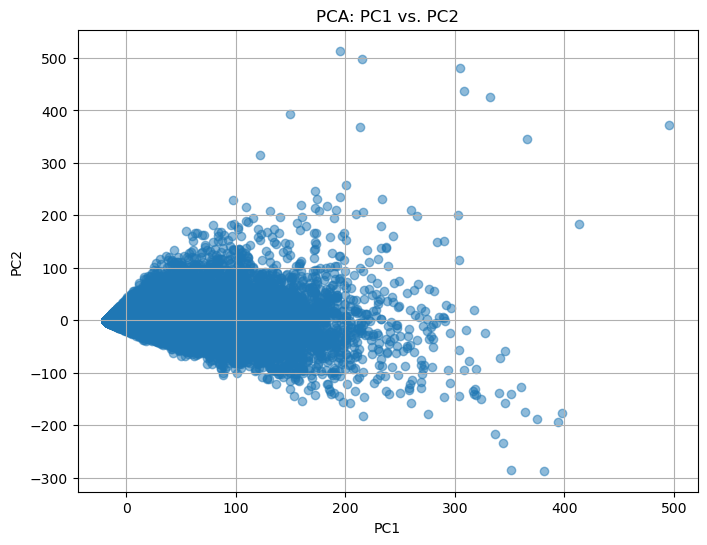

In [22]:
# Extract the first and second principal components from the DataFrame
pc1 = ps[0]
pc2 = ps[1]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, alpha=0.5)
plt.title('PCA: PC1 vs. PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

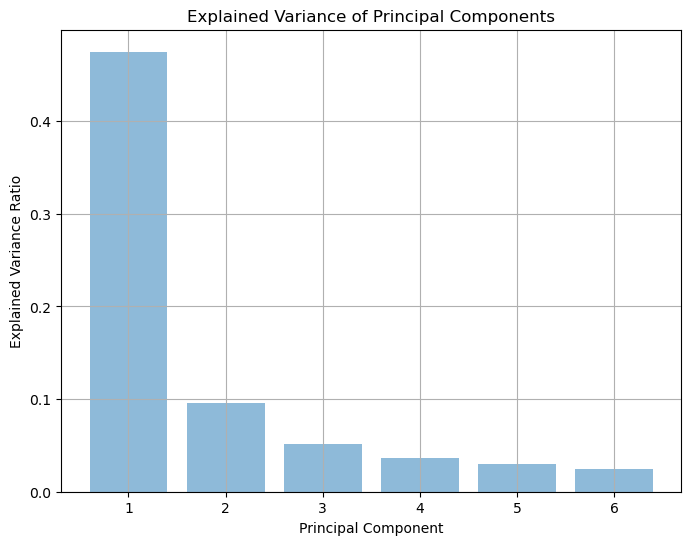

In [24]:
# Assuming 'pca' is your PCA model
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance for each PC
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.xticks(range(1, len(explained_variance) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Principal Components')
plt.grid(True)
plt.show()

(204207, 2)
           0          1
0 -15.367386   0.588745
1   6.938257  27.627858
2  -4.411814   2.225211
3 -17.100659  -0.443287
4 -13.311972  -1.135273


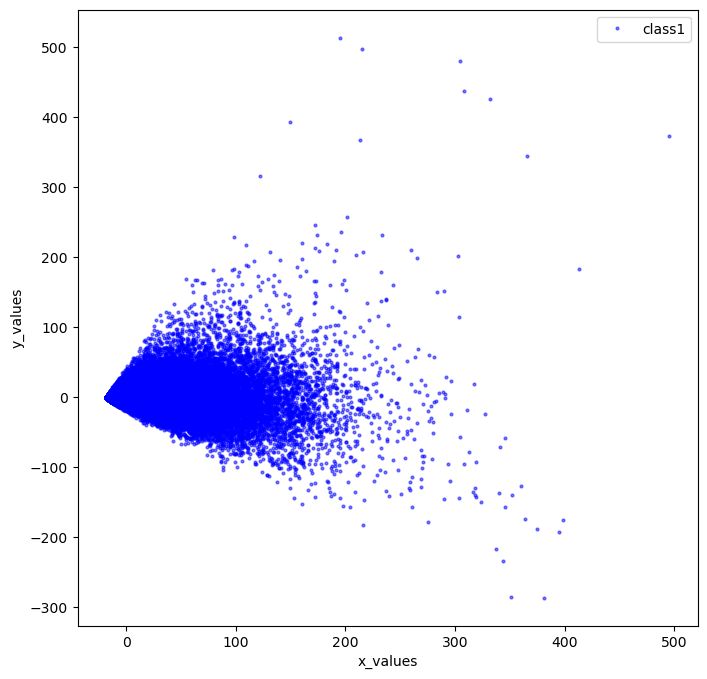

In [94]:
tocluster = pd.DataFrame(ps[[0,1]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[0], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to 

C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to 

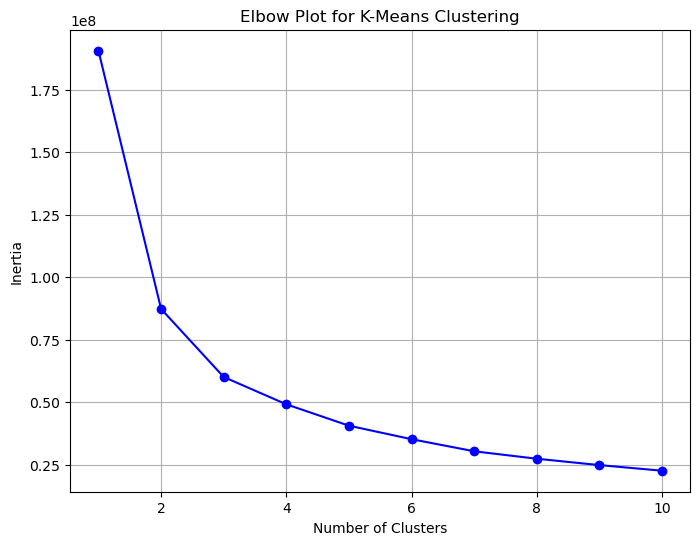

In [115]:
# Initialize an empty list to store the inertia values
inertia = []

# Define the range of cluster numbers you want to test
num_clusters = range(1, 11)  # You can adjust the upper limit as needed

# Calculate the inertia for each cluster number
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tocluster)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [116]:
clusterer = KMeans(n_clusters=3,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to 

[[ 29.04088487   1.06002207]
 [-10.41418262  -0.14642335]
 [110.42347996  -1.48261811]]


C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Krittika\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [117]:
print (c_preds[0:100])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1]


['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


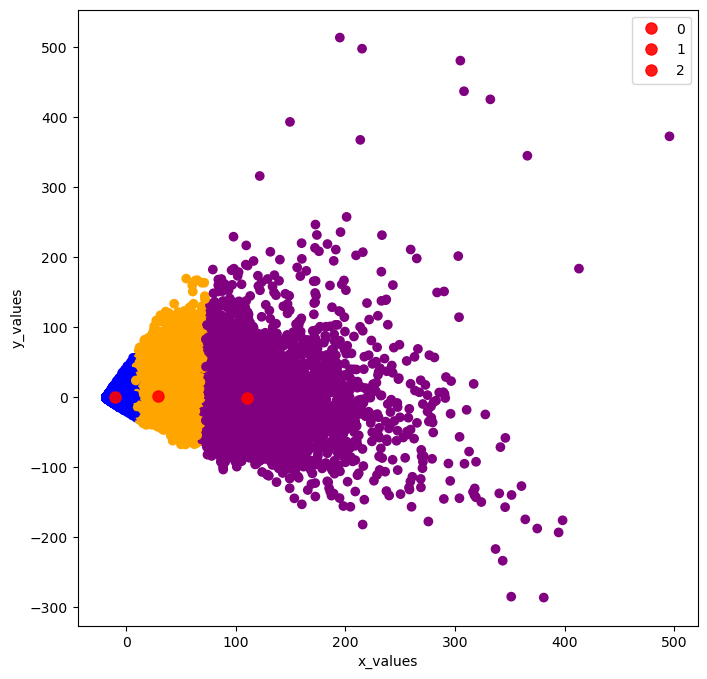

In [118]:
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[0],tocluster[1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [119]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,33,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,1,0,14,1


(204207, 135)


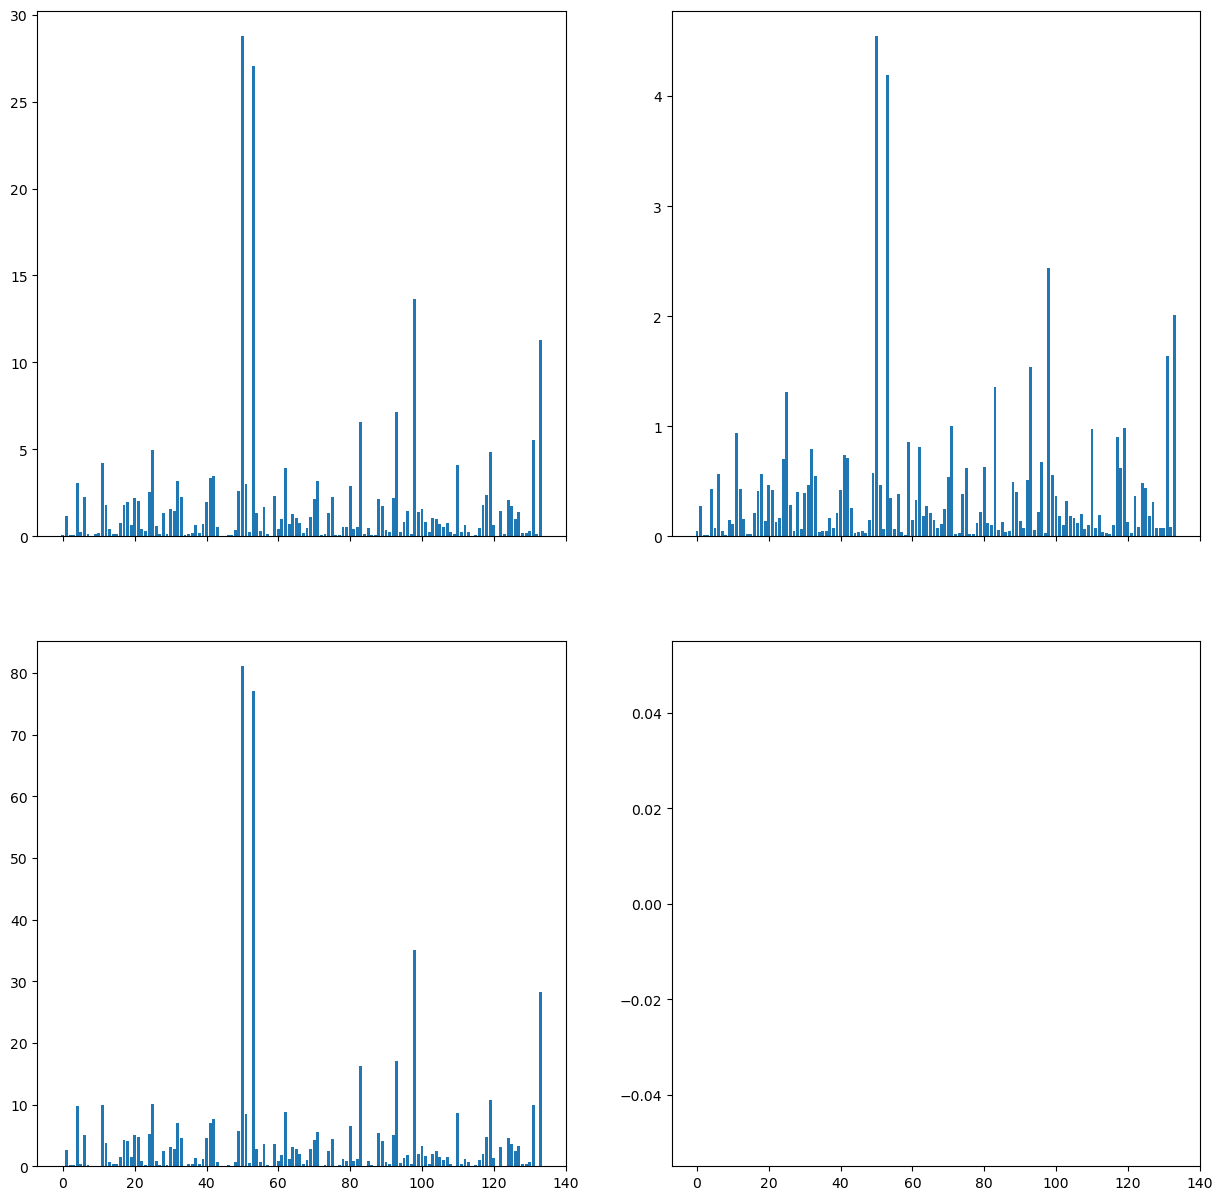

In [120]:
print (clust_prod.shape)
f,arr = plt.subplots(2,2,sharex=True,figsize=(15,15))

c1_count = len(clust_prod[clust_prod['cluster']==0])

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)
plt.show()

In [121]:
c0.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     28.755864
fresh vegetables                 27.038897
packaged vegetables fruits       13.633934
yogurt                           11.304053
packaged cheese                   7.147326
milk                              6.557621
water seltzer sparkling water     5.551949
chips pretzels                    4.947973
soy lactosefree                   4.819140
bread                             4.228695
dtype: float64

In [122]:
c1.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     4.543757
fresh vegetables                 4.196386
packaged vegetables fruits       2.433713
yogurt                           2.012021
water seltzer sparkling water    1.636877
packaged cheese                  1.538587
milk                             1.359580
chips pretzels                   1.307006
ice cream ice                    0.997816
soy lactosefree                  0.988149
dtype: float64

In [123]:
c2.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     81.088168
fresh vegetables                 77.106692
packaged vegetables fruits       35.119615
yogurt                           28.316198
packaged cheese                  17.024698
milk                             16.236789
soy lactosefree                  10.687679
chips pretzels                   10.044658
water seltzer sparkling water     9.966829
bread                             9.884836
dtype: float64

In [124]:
c3.sort_values(ascending=False)[0:10]

aisle
air fresheners candles   NaN
asian foods              NaN
baby accessories         NaN
baby bath body care      NaN
baby food formula        NaN
bakery desserts          NaN
baking ingredients       NaN
baking supplies decor    NaN
beauty                   NaN
beers coolers            NaN
dtype: float64

In [125]:
from IPython.display import display, HTML
cluster_means = [[c0['fresh fruits'],c0['fresh vegetables'],c0['packaged vegetables fruits'], c0['yogurt'], c0['packaged cheese'], c0['milk'],c0['water seltzer sparkling water'],c0['chips pretzels']],
                 [c1['fresh fruits'],c1['fresh vegetables'],c1['packaged vegetables fruits'], c1['yogurt'], c1['packaged cheese'], c1['milk'],c1['water seltzer sparkling water'],c1['chips pretzels']],
                 [c2['fresh fruits'],c2['fresh vegetables'],c2['packaged vegetables fruits'], c2['yogurt'], c2['packaged cheese'], c2['milk'],c2['water seltzer sparkling water'],c2['chips pretzels']],
                 [c3['fresh fruits'],c3['fresh vegetables'],c3['packaged vegetables fruits'], c3['yogurt'], c3['packaged cheese'], c3['milk'],c3['water seltzer sparkling water'],c3['chips pretzels']]]
cluster_means = pd.DataFrame(cluster_means, columns = ['fresh fruits','fresh vegetables','packaged vegetables fruits','yogurt','packaged cheese','milk','water seltzer sparkling water','chips pretzels'])
HTML(cluster_means.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,28.755864,27.038897,13.633934,11.304053,7.147326,6.557621,5.551949,4.947973
1,4.543757,4.196386,2.433713,2.012021,1.538587,1.359580,1.636877,1.307006
2,81.088168,77.106692,35.119615,28.316198,17.024698,16.236789,9.966829,10.044658
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
cluster_perc = cluster_means.iloc[:, :].apply(lambda x: (x / x.sum())*100,axis=1)
HTML(cluster_perc.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,27.402817,25.766639,12.992418,10.772165,6.811024,6.249066,5.290714,4.715157
1,23.879412,22.053828,12.790216,10.574042,8.085940,7.145181,8.602497,6.868884
2,29.496941,28.048624,12.775245,10.300408,6.192969,5.906356,3.625572,3.653883
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
c0.sort_values(ascending=False)[10:15]

aisle
refrigerated           4.125751
frozen produce         3.936816
energy granola bars    3.444290
eggs                   3.340330
ice cream ice          3.201541
dtype: float64

In [128]:
c1.sort_values(ascending=False)[10:15]

aisle
refrigerated      0.973938
bread             0.941128
soft drinks       0.898257
frozen meals      0.854203
frozen produce    0.813851
dtype: float64

In [129]:
c2.sort_values(ascending=False)[10:15]

aisle
baby food formula      9.709506
frozen produce         8.749426
refrigerated           8.630385
fresh herbs            8.398909
energy granola bars    7.643021
dtype: float64

In [130]:
c3.sort_values(ascending=False)[10:15]

aisle
body lotions soap              NaN
bread                          NaN
breakfast bakery               NaN
breakfast bars pastries        NaN
bulk dried fruits vegetables   NaN
dtype: float64

## Cluster Characteristics:

### Cluster 0: 

This cluster tends to purchase a variety of fresh and packaged foods, including fresh fruits, fresh vegetables, yogurt, and dairy products. It has a relatively balanced distribution of various product categories.

### Cluster 1: 

Customers in this cluster show a strong preference for baby food and formula, making it a distinct group with a focus on family and baby-related products.

### Cluster 2: 

This cluster is characterized by a strong preference for fresh fruits, yogurt, and beverages like water and sparkling water, indicating a health-conscious and fresh food-focused group.

### Cluster 3: 

Customers in this cluster primarily buy fresh vegetables, making it a group with a high preference for vegetables and fresh herbs.

## Top Product Categories:

Each cluster has its own set of top product categories, and these categories play a significant role in shaping the cluster's preferences. For example, fresh fruits are a top category for Cluster 0, while baby food formula is the top category for Cluster 

## Additional Product Preferences:

Beyond the top categories, you've identified the 10th to 15th most frequently bought product categories for each cluster, providing a deeper understanding of their preferences.

## Marketing and Personalization:

These insights can guide marketing efforts and personalized recommendations. For example, Cluster 1, which has a strong preference for baby-related products, can be targeted with promotions and recommendations tailored to families.

## Business Strategy:

Inventory management and stocking decisions can be informed by the specific preferences of each cluster. For example, Cluster 0's preference for fresh foods may influence inventory decisions related to these items.

## Data-Driven Decisions:

The study demonstrates the power of data-driven decision-making and how it can improve business strategies, optimize inventory, and enhance the overall shopping experience for customers.


In summary, the specific inferences drawn from the outputs revolve around understanding each cluster's unique characteristics, top product preferences, and the potential for targeted marketing and business strategy adjustments based on these insights. These inferences can guide the business in making data-driven decisions to better serve its customers.

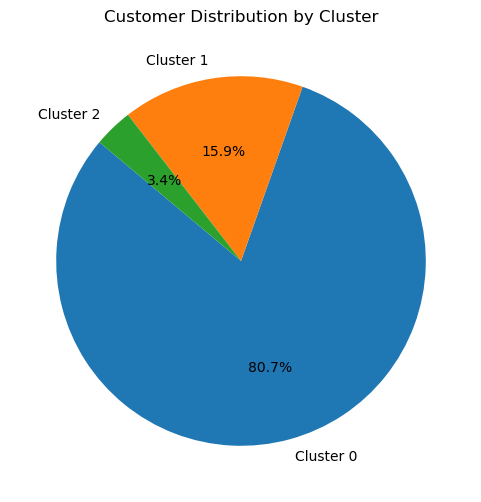

In [132]:
# Calculate the count of customers in each cluster
cluster_counts = clust_prod['cluster'].value_counts()

# Create a pie chart to visualize the distribution of customers across clusters
plt.figure(figsize=(6, 6))
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
plt.pie(cluster_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Customer Distribution by Cluster')
plt.show()

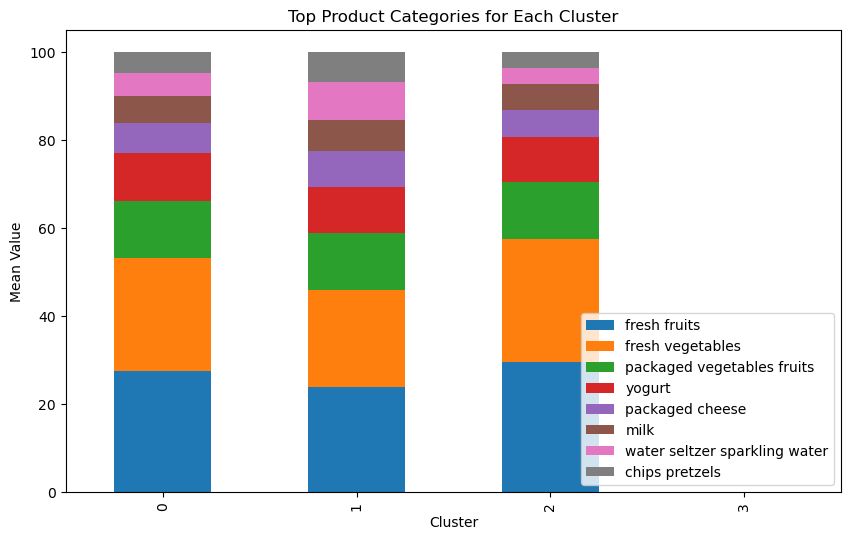

In [133]:
# Assuming you have the `cluster_means` DataFrame
cluster_perc.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top Product Categories for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.show()

In [114]:
print(cluster_perc.dtypes)
print(cluster_perc.head())

fresh fruits                     float64
fresh vegetables                 float64
packaged vegetables fruits       float64
yogurt                           float64
packaged cheese                  float64
milk                             float64
water seltzer sparkling water    float64
chips pretzels                   float64
dtype: object
   fresh fruits  fresh vegetables  packaged vegetables fruits     yogurt  \
0     23.211080         20.838611                   12.693961  10.635273   
1     29.476052         30.267129                   12.896678   9.467636   
2     28.776003         24.752192                   12.751656  11.437322   
3     26.424426         26.187218                   13.087148  10.346017   

   packaged cheese      milk  water seltzer sparkling water  chips pretzels  
0         8.365402  7.437040                       9.463699        7.354935  
1         5.969887  5.618128                       3.011971        3.292520  
2         6.633879  6.389402               

C:\Users\Krittika\AppData\Local\Temp\ipykernel_25724\3114675042.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(categories_c0.index, rotation=45, ha="right")
C:\Users\Krittika\AppData\Local\Temp\ipykernel_25724\3114675042.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(categories_c1.index, rotation=45, ha="right")
C:\Users\Krittika\AppData\Local\Temp\ipykernel_25724\3114675042.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(categories_c2.index, rotation=45, ha="right")
C:\Users\Krittika\AppData\Local\Temp\ipykernel_25724\3114675042.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(categories_c3.index, rotation=45, ha="right")


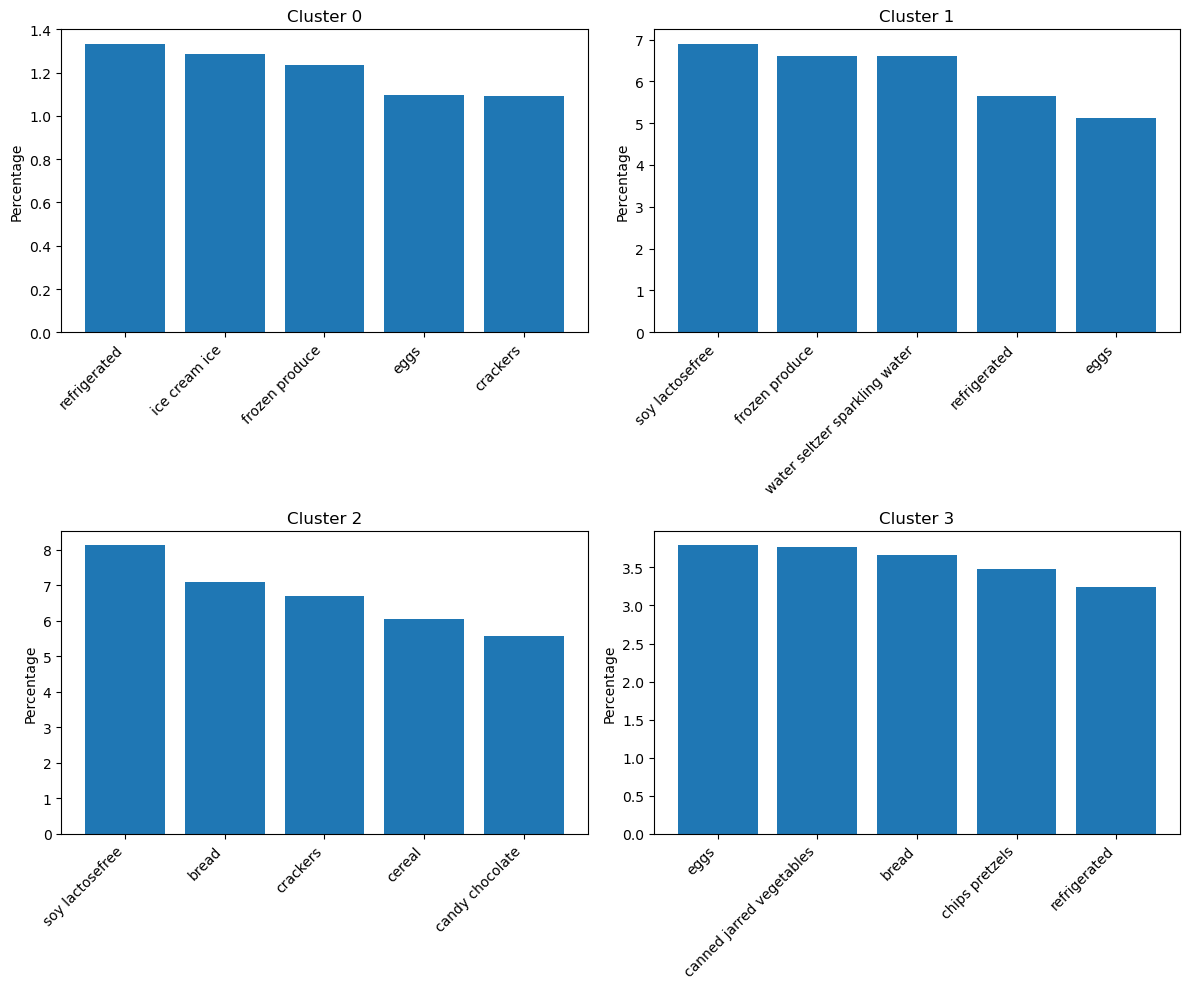

In [74]:
# Data for the 10th to 15th product categories for each cluster
categories_c0 = c0.sort_values(ascending=False)[10:15]
categories_c1 = c1.sort_values(ascending=False)[10:15]
categories_c2 = c2.sort_values(ascending=False)[10:15]
categories_c3 = c3.sort_values(ascending=False)[10:15]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot for Cluster 0
axes[0, 0].bar(categories_c0.index, categories_c0.values)
axes[0, 0].set_title('Cluster 0')
axes[0, 0].set_xticklabels(categories_c0.index, rotation=45, ha="right")
axes[0, 0].set_ylabel('Percentage')

# Plot for Cluster 1
axes[0, 1].bar(categories_c1.index, categories_c1.values)
axes[0, 1].set_title('Cluster 1')
axes[0, 1].set_xticklabels(categories_c1.index, rotation=45, ha="right")
axes[0, 1].set_ylabel('Percentage')

# Plot for Cluster 2
axes[1, 0].bar(categories_c2.index, categories_c2.values)
axes[1, 0].set_title('Cluster 2')
axes[1, 0].set_xticklabels(categories_c2.index, rotation=45, ha="right")
axes[1, 0].set_ylabel('Percentage')

# Plot for Cluster 3
axes[1, 1].bar(categories_c3.index, categories_c3.values)
axes[1, 1].set_title('Cluster 3')
axes[1, 1].set_xticklabels(categories_c3.index, rotation=45, ha="right")
axes[1, 1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

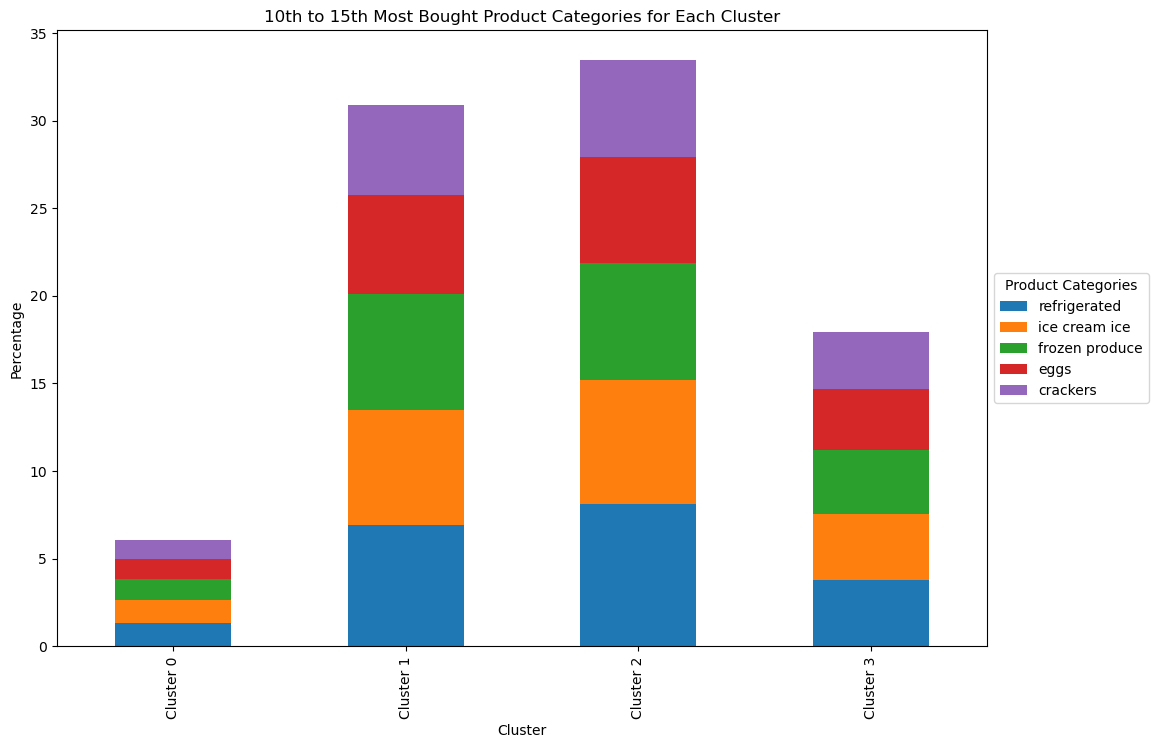

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the 10th to 15th product categories for each cluster
categories_c0 = c0.sort_values(ascending=False)[10:15]
categories_c1 = c1.sort_values(ascending=False)[10:15]
categories_c2 = c2.sort_values(ascending=False)[10:15]
categories_c3 = c3.sort_values(ascending=False)[10:15]

# Create a DataFrame to hold the data for plotting
stacked_data = pd.DataFrame({
    'Cluster 0': categories_c0.values,
    'Cluster 1': categories_c1.values,
    'Cluster 2': categories_c2.values,
    'Cluster 3': categories_c3.values
}, index=categories_c0.index)

# Create a stacked bar chart
ax = stacked_data.T.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set plot title and labels
plt.title('10th to 15th Most Bought Product Categories for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')

# Display the plot
plt.legend(title='Product Categories', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [81]:
departments = pd.read_csv('departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [82]:
# Merge the 'products' and 'departments' DataFrames on 'department_id'
merged_df = products.merge(departments, on='department_id')

# Display the first few rows of the merged DataFrame
print(merged_df.head())

   product_id                                 product_name  aisle_id  \
0           1                   Chocolate Sandwich Cookies        61   
1          16                Mint Chocolate Flavored Syrup       103   
2          25      Salted Caramel Lean Protein & Fiber Bar         3   
3          32                Nacho Cheese White Bean Chips       107   
4          41  Organic Sourdough Einkorn Crackers Rosemary        78   

   department_id department  
0             19     snacks  
1             19     snacks  
2             19     snacks  
3             19     snacks  
4             19     snacks  


In [86]:
# Merge the 'products' DataFrame with 'aisles' and 'departments'
master_df = products.merge(aisles, on='aisle_id').merge(departments, on='department_id')

# Display the first few rows of the merged DataFrame
print(master_df.head())

   product_id                                    product_name  aisle_id  \
0           1                      Chocolate Sandwich Cookies        61   
1          78               Nutter Butter Cookie Bites Go-Pak        61   
2         102                           Danish Butter Cookies        61   
3         172  Gluten Free All Natural Chocolate Chip Cookies        61   
4         285                    Mini Nilla Wafers Munch Pack        61   

   department_id          aisle department  
0             19  cookies cakes     snacks  
1             19  cookies cakes     snacks  
2             19  cookies cakes     snacks  
3             19  cookies cakes     snacks  
4             19  cookies cakes     snacks  


In [87]:
# Assuming you have the c0 DataFrame
c0_with_department = c0.reset_index()
c0_with_department = c0_with_department.merge(master_df, left_on='aisle', right_on='aisle')
print(c0_with_department.head())

                    aisle         0  product_id  \
0  air fresheners candles  0.056664         318   
1  air fresheners candles  0.056664         328   
2  air fresheners candles  0.056664         583   
3  air fresheners candles  0.056664         587   
4  air fresheners candles  0.056664        1040   

                                        product_name  aisle_id  department_id  \
0                        Apple Cinnamon Crisp Candle       101             17   
1  Disinfectant Spray Cherry Blossom & Pomegranat...       101             17   
2                       Vanilla Incense of Auroville       101             17   
3                      Air Effects Gain Island Fresh       101             17   
4                       Clean Linen Wax Melts Refill       101             17   

  department  
0  household  
1  household  
2  household  
3  household  
4  household  
